# STIX-Shifter CLI Quick Lab

## Overview

STIX (Structured Threat Information eXpression) is a JSON structure used to share cybersecurity threat intelligence. STIX-shifter is an open-source python library that is part of the Open Cybersecurity Alliance. It allows data repositories to be queried using STIX patterning and return the results as STIX cyber observable objects. This lab will allow users to test out the various stix-shifter CLI commands.

### STIX Patterning

A [STIX pattern](http://docs.oasis-open.org/cti/stix/v2.0/cs01/part5-stix-patterning/stix-v2.0-cs01-part5-stix-patterning.html) is used to query [cyber observable objects](https://docs.oasis-open.org/cti/stix/v2.0/stix-v2.0-part4-cyber-observable-objects.html). STIX patterns take the format of:

`[<OBJECT>:<PROPERTY> = 'some value' AND <OBJECT>:<PROPERTY> IN (value_1, value_2)] OR [<OBJECT>:<PROPERTY> = 'some value']`

The `[ ]` represents one observation. A pattern can have multiple observations joined by the AND or OR observation operators. An observation can be thought of as one instance or row of data. Within the observation is one or more comparison expressions that looks for a value associated to a cyber observable STIX object and its property. This is a sample pattern with one observation containing an comparison operation for an IP lookup: `[ipv4-addr:value = '1.2.3.4']`. The STIX object in this case is `ipv4-addr` and the property on that object is `value`.

### STIX Observed Data

STIX-shifter returns a `bundle` of STIX `observed-data` objects. The bundle is a container object to hold the results. Below is a sample bundle containing one identity object (representing the data source) and one observed-data object:

```json
{
    "type": "bundle",
    "id": "bundle--57d455df-105d-4722-8277-e569110e82ed",
    "objects": [
        {
            "type": "identity",
            "id": "identity--f431f809-377b-45e0-aa1c-6a4751cae5ff",
            "name": "QRadar",
            "identity_class": "system"
        },
        {
            "id": "observed-data--4db61897-4725-483b-9e68-2874e48650c5",
            "type": "observed-data",
            "created_by_ref": "identity--f431f809-377b-45e0-aa1c-6a4751cae5ff",
            "created": "2022-04-28T14:16:41.544Z",
            "modified": "2022-04-28T14:16:41.544Z",
            "objects": {
                "0": {
                    "type": "x-oca-event",
                    "action": "Logon Failure - Unknown user name or bad password",
                    "outcome": "Host Login Failed",
                    "category": [
                        "Authentication"
                    ],
                    "provider": "Microsoft Windows Security Event Log",
                    "agent": "WindowsAuthServer @ microsoft.windows.test.com",
                    "created": "2021-06-28T19:35:58.000Z",
                    "network_ref": "2",
                    "user_ref": "4",
                    "url_ref": "7",
                    "file_ref": "8"
                },
                "1": {
                    "type": "ipv4-addr",
                    "value": "109.0.216.203"
                },
                "2": {
                    "type": "network-traffic",
                    "src_ref": "1",
                    "src_port": 3000,
                    "dst_ref": "3",
                    "dst_port": 1000,
                    "protocols": [
                        "TCP"
                    ]
                },
                "3": {
                    "type": "ipv4-addr",
                    "value": "192.168.1.11"
                },
                "4": {
                    "type": "user-account",
                    "user_id": "bill_holland"
                },
                "5": {
                    "type": "ipv4-addr",
                    "value": "0.0.0.0"
                },
                "6": {
                    "type": "artifact",
                    "payload_bin": "PDEzPk1hciAyMSAwMTo0Mjo1MCBtaWNyb3NvZnQud2luZG93cy50ZXN0LmNvbQ==",
                    "mime_type": "text/plain"
                },
                "7": {
                    "type": "url",
                    "value": "www.example.com"
                },
                "8": {
                    "type": "file",
                    "name": "myfile.exe",
                    "hashes": {
                        "SHA-256": "86c5ceb27e1bf441130299c0209e5f35b88089f62c06b2b09d65772274f12057"
                    },
                    "parent_directory_ref": "9"
                },
                "9": {
                    "type": "directory",
                    "path": "C://filepath"
                }
            },
            "first_observed": "2021-06-28T19:35:58.652Z",
            "last_observed": "2021-06-28T19:36:58.652Z",
            "number_observed": 31
        }
    ],
    "spec_version": "2.0"
}
```

Each observed-data object contains a numbered set of cyber-observable objects. The properties on the cyber-observable object store the data returned from the data source. See the [STIX 2.0 standard](https://docs.oasis-open.org/cti/stix/v2.0/stix-v2.0-part4-cyber-observable-objects.html) for more on cyber observable objects.

### STIX-Shifter CLI commands

The CLI tools, and by extension the connector logic, is broken up into two types functions: `translate` and `transmit`. The translate functions convert a STIX pattern into a native data source query, and convert JSON results returned from the data source into STIX objects. The transmit functions implement the data source API calls for making queries, checking the query status, fething query results, pinging the data source, and deleting a search (if supported by the APIs).

## Setup

### Prerequisites

* Python 3
* pip
* venv
* Ability to run bash commands

### 1. Open a terminal and install a Python virtual environment

`python3 -m venv labenv`

`source labenv/bin/activate`

### 2. Install jupyter notebook

`pip install notebook`

### 3. Install ipython kernal to use virtual environment

`ipython kernel install --user --name=labenv`

### 4. Run jupyter notebook

`jupyter notebook`

### All remaining steps take place in the jupyter notebook

### 5. Change the Kernel to use the virtual environment

This will cause every notebook cell to run in the virtual environment.

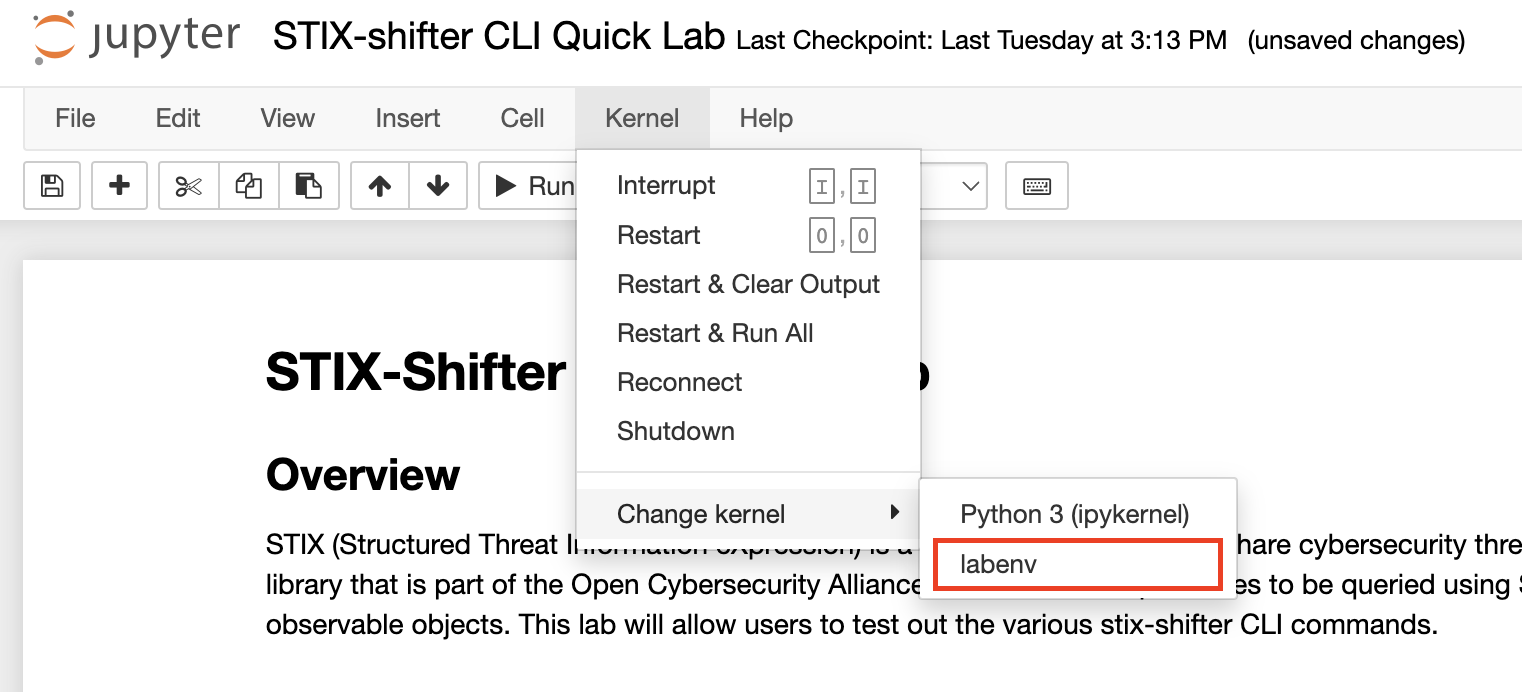

### 6. Install the required stix-shifter libraries

This installs the core stix-shifter and utils library along with the STIX-bundle and QRadar connectors.

In [ ]:
%%bash
pip install \
stix-shifter \
stix-shifter-utils \
stix-shifter-modules-stix_bundle \
stix-shifter-modules-qradar \
stix-shifter-modules-mysql \
stix-shifter-modules-reaqta

In [ ]:
%pip list

# Lab Exercise 1: Using CLI tools with the STIX-Bundle connector

## Examine the STIX Bundle
This is a bundle of STIX observed-data objects containing sanitized data from a CrowdStrike instance.

https://raw.githubusercontent.com/opencybersecurityalliance/stix-shifter/develop/data/cybox/crowdstrike/crowdstrike_detections_20210723.json

The stix_bundle connector will query the sample STIX bundle and return a subset of data based on the query pattern.

Note the bundle of observed-data objects that are returned. Each of these objects contains a numbered set of cyber observable objects (`url`, `network-traffic`, `ipv4-addr`…) which contain the data from the target data source. Given the above CLI example, the `ipv4-addr` object should contain a value property with **12.111.222.0**

## STIX-Shifter Transmission CLI commands
The transmission commands use the data source APIs to send a query, check the status, fetch the results, and ping the connection.

## Step 1: Set environment variables to be used in the CLI

### STIX Bundle URL
This points to a publicly aviablable, static JSON file of STIX data. 

In [ ]:
%env BUNDLE_URL https://raw.githubusercontent.com/opencybersecurityalliance/stix-shifter/develop/data/cybox/crowdstrike/crowdstrike_detections_20210723.json
    


### STIX Identity Object
The identity object represents the data source the STIX results are taken from. As we will see, the identity object is passed into some of the CLI commands so that STIX-shifter can prepend it to the top of the bundle of STIX results.

In [ ]:
%env IDENTITY_OBJECT \
{ \
 "type":"identity", \
 "id":"identity--f431f809-377b-45e0-aa1c-6a4751cae5ff", \
 "name":"STIX Bundle", \
 "identity_class":"system", \
 "created": "2022-04-07T20:35:41.042Z", \
 "modified": "2022-04-07T20:35:41.042Z" \
}   

### Authentication object
The CLI transmission commands require that connection and authention details are passed in so that the connector can talk to the target data source. In this case the `"auth"` object is empty since the STIX bundle we will query is publicly available and doesn't need any access credentials.

In [ ]:
%env BUNDLE_AUTH {"auth": {}}

## Step 2: Run the ping command
The `ping` command checks that the data source can be reached by the stix-shifter connector.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" ping

## Step 3: Run the query command
This command sends the native query to the data source.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" query "[ipv4-addr:value = '192.168.0.8']"

## Step 4: Run the status command
This command checks the status of the query.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" status "[ipv4-addr:value = '192.168.0.8']"

## Step 5: Run the results command
This command fetches the query results

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" results "[ipv4-addr:value = '192.168.6.242']" 0 2

## Step 6: Run the execute command
The execute command runs through the entire stix-shifter flow:

* Translates a STIX pattern into a native data source query
* Sends the query to the data source via the data source APIs
* Checks the status of the query via the data source APIs
* Fetches the query results via the APIs and, if needed, converts them to JSON
* Translates the JSON results into STIX objects

In [ ]:
%%bash
stix-shifter execute stix_bundle stix_bundle "$IDENTITY_OBJECT" '{"url": "'"$BUNDLE_URL"'"}' \
"$BUNDLE_AUTH" "[ipv4-addr:value = '12.111.222.0']"

# Lab Exercise 2: Using CLI tools with the MySQL connector

This connector relies on running a local or remote MySQL database. The transmission calls interface with the datasource using the source APIs, in this case [mysql.connector](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_transmission/api_client.py#L1). This is differenct from the STIX bundle connector that searches against a static JSON of data.

## Step 1: Set environment variables to be used in the CLI and load MySQL

### Load the variables
This will set variables for the database user, password, host, and name.

In [ ]:
%env DB_USER root
%env DB_PASSWORD giveamanafish
%env DB_HOST localhost
%env DB_NAME demo_db

### Load the Jupyter notebook MySQL extension

In [ ]:
%load_ext sql
%sql mysql+mysqldb://$DB_USER:$DB_PASSWORD@$DB_HOST/$DB_NAME

## Step 2: Examine the demo table contents

This will be the data the MySQL connector will query against.

In [ ]:
%%sql

SELECT * FROM demo_table;